In [1]:
import pandas as pd
import numpy as np
import random

## SERIES

In [2]:
exam1 = [89,85,93,83]
labels = ['Student A', 'Student B', 'Student C', 'Student D']

pd.Series(exam1,labels)

Student A    89
Student B    85
Student C    93
Student D    83
dtype: int64

In [3]:
pd.Series(exam1,labels)['Student D']

83

In [4]:
# Series ze słownika
d = {s:p for s,p in zip(labels,exam1)} #słownik
d

{'Student A': 89, 'Student B': 85, 'Student C': 93, 'Student D': 83}

In [5]:
pd.Series(d)

Student A    89
Student B    85
Student C    93
Student D    83
dtype: int64

In [6]:
exam2 = [74,56,44,92]
e1 = pd.Series(exam1,labels)
e2 = pd.Series(exam2,labels)

In [7]:
##Działania na serii

In [8]:
e1+e2

Student A    163
Student B    141
Student C    137
Student D    175
dtype: int64

In [9]:
e1*e2

Student A    6586
Student B    4760
Student C    4092
Student D    7636
dtype: int64

In [10]:
e1/5

Student A    17.8
Student B    17.0
Student C    18.6
Student D    16.6
dtype: float64

# DataFrame

In [11]:
df = pd.DataFrame({'e1':exam1, 'e2':exam2},index=labels)
df

,e1,e2
Student A,89,74
Student B,85,56
Student C,93,44
Student D,83,92


In [12]:
data = np.array([exam1,exam2])
data.transpose()

array([[89, 74],
       [85, 56],
       [93, 44],
       [83, 92]])

In [13]:
df = pd.DataFrame(data.transpose(),index=labels,columns=['e1','e2'])
df

,e1,e2
Student A,89,74
Student B,85,56
Student C,93,44
Student D,83,92


In [14]:
df.to_numpy() #zamiana DataFrame"df" na ndarray

array([[89, 74],
       [85, 56],
       [93, 44],
       [83, 92]])

In [15]:
df.shape

(4, 2)

In [16]:
df['e3']=[67,59,79,84]  #dodawanie nowej kolumny
df

,e1,e2,e3
Student A,89,74,67
Student B,85,56,59
Student C,93,44,79
Student D,83,92,84


In [17]:
df['semestr1'] = df['e1']+df['e2']+df['e3']
df

,e1,e2,e3,semestr1
Student A,89,74,67,230
Student B,85,56,59,200
Student C,93,44,79,216
Student D,83,92,84,259


In [18]:
df.loc['Student C']

e1           93
e2           44
e3           79
semestr1    216
Name: Student C, dtype: int64

In [19]:
df.loc['Student C','e2']

44

In [20]:
df.loc[['Student C','Student D'],['e2','e3']]   #fancy indexing

,e2,e3
Student C,44,79
Student D,92,84


In [21]:
df['e2']>70

Student A     True
Student B    False
Student C    False
Student D     True
Name: e2, dtype: bool

In [22]:
df[(df['e2']>70)&(df['e3']>70)]

,e1,e2,e3,semestr1
Student D,83,92,84,259


In [23]:
df.drop('semestr1',axis=1)   # ustawić inpalce=True usunie kolumnę 'semestr1' na stałe

,e1,e2,e3
Student A,89,74,67
Student B,85,56,59
Student C,93,44,79
Student D,83,92,84


In [24]:
df

,e1,e2,e3,semestr1
Student A,89,74,67,230
Student B,85,56,59,200
Student C,93,44,79,216
Student D,83,92,84,259


In [25]:
df.rename (str.upper, axis='columns', inplace=True)
df

,E1,E2,E3,SEMESTR1
Student A,89,74,67,230
Student B,85,56,59,200
Student C,93,44,79,216
Student D,83,92,84,259


In [26]:
df = pd.DataFrame({'A':[100,44,56,99,85,100],
                  'B':['Panda','Snake','Snake','Rat','Dog','Panda']})
df

,A,B
0,100,Panda
1,44,Snake
2,56,Snake
3,99,Rat
4,85,Dog
5,100,Panda


In [27]:
df['B'].unique() #unikalne wartości kolumny 'B'

array(['Panda', 'Snake', 'Rat', 'Dog'], dtype=object)

In [28]:
df['B'].nunique() #liczba unikalnych wartości w kolumnie 'B'

4

In [29]:
df['B'].value_counts() #pokazuje ile razy poszczególne wartości występują w kolumnie 'B'

B
Panda    2
Snake    2
Rat      1
Dog      1
Name: count, dtype: int64

In [30]:
df['B'].value_counts(normalize=True) # procentowy udział poszczególnych wartości w kolumnie 'B'

B
Panda    0.333333
Snake    0.333333
Rat      0.166667
Dog      0.166667
Name: proportion, dtype: float64

In [31]:
df.sort_values(by='A') #sortowanie względem kolumny 'A'

,A,B
1,44,Snake
2,56,Snake
4,85,Dog
3,99,Rat
0,100,Panda
5,100,Panda


In [32]:
df.sort_values(by='A', ascending=False)  # sortowanie malejące

,A,B
0,100,Panda
5,100,Panda
3,99,Rat
4,85,Dog
2,56,Snake
1,44,Snake


In [33]:
df.drop_duplicates(subset='B') # usuwanie duplikatów względem kolumny 'B' (bez subset cały wiersz musi być taki sam)

,A,B
0,100,Panda
1,44,Snake
3,99,Rat
4,85,Dog


In [34]:
exam1 = [89,85,93,83]
exam2 = [74,56,44,92]
exam3=[67,59,79,84]
df = pd.DataFrame({'e1':exam1, 'e2':exam2, 'e3':exam3}, index=labels)
df['semester1'] = df['e1']+df['e2']+df['e3']
df

,e1,e2,e3,semester1
Student A,89,74,67,230
Student B,85,56,59,200
Student C,93,44,79,216
Student D,83,92,84,259


In [35]:
schools = ['High School X','High School X','High School Y','High School Y']
multi_index_list = [(school,student) for school,student in zip(schools,df.index)]  #multindex z tuples
multi_index_list

[('High School X', 'Student A'),
 ('High School X', 'Student B'),
 ('High School Y', 'Student C'),
 ('High School Y', 'Student D')]

In [36]:
df.index = pd.MultiIndex.from_tuples(multi_index_list,names=['School','Student'])
df

e1  e2  e3  semester1
School        Student                         
High School X Student A  89  74  67        230
              Student B  85  56  59        200
High School Y Student C  93  44  79        216
              Student D  83  92  84        259

In [37]:
df = pd.DataFrame({'e1':exam1, 'e2':exam2, 'e3':exam3}, index=labels)
df['semester1'] = df['e1']+df['e2']+df['e3']
# multiindex przy pomocy set_index ['High...'] -nowy index, df.index - istniejący index
df.set_index([pd.Index(['High School X','High School X','High School Y','High School Y']), df.index],inplace=True)
df.index.names=['School','Student'] #nadawanie nazwy indeksom
df

e1  e2  e3  semester1
School        Student                         
High School X Student A  89  74  67        230
              Student B  85  56  59        200
High School Y Student C  93  44  79        216
              Student D  83  92  84        259

In [38]:
df.loc['High School X']

,e1,e2,e3,semester1
Student,,,,
Student A,89,74,67,230
Student B,85,56,59,200


In [39]:
df.loc['High School X'].iloc[1]

e1            85
e2            56
e3            59
semester1    200
Name: Student B, dtype: int64

In [40]:
df.loc['High School X'].loc['Student B']

e1            85
e2            56
e3            59
semester1    200
Name: Student B, dtype: int64

In [41]:
df

e1  e2  e3  semester1
School        Student                         
High School X Student A  89  74  67        230
              Student B  85  56  59        200
High School Y Student C  93  44  79        216
              Student D  83  92  84        259

In [42]:
df.xs('High School Y')

,e1,e2,e3,semester1
Student,,,,
Student C,93,44,79,216
Student D,83,92,84,259


In [43]:
df.xs(('High School Y','Student D'))

e1            83
e2            92
e3            84
semester1    259
Name: (High School Y, Student D), dtype: int64

In [44]:
df.xs('Student D',level='Student')

,e1,e2,e3,semester1
School,,,,
High School Y,83,92,84,259


In [45]:
##Ćwiczenie
df

e1  e2  e3  semester1
School        Student                         
High School X Student A  89  74  67        230
              Student B  85  56  59        200
High School Y Student C  93  44  79        216
              Student D  83  92  84        259

In [46]:
exam1 = [89,85,93,83]
exam2 = [74,56,44,92]
exam3=[67,59,79,84]
df = pd.DataFrame({'e1':exam1, 'e2':exam2, 'e3':exam3}, index=labels)
df['semester1'] = df['e1']+df['e2']+df['e3']
exam4 = [random.randint(1,101),random.randint(1,101),random.randint(1,101),random.randint(1,101)]
exam5 = [random.randint(1,101),random.randint(1,101),random.randint(1,101),random.randint(1,101)]
exam6 = [random.randint(1,101),random.randint(1,101),random.randint(1,101),random.randint(1,101)]
df.drop('semester1',axis=1,inplace=True)
df['e4']=exam4
df['e5']=exam5
df['e6']=exam6
data = np.array([exam1,exam2,exam3,exam4,exam5,exam6])
sem_ex = [['semester1','semester1','semester1','semester2','semester2','semester2'],['e1','e2','e3','e4','e5','e6']]
tuples = list(zip(*sem_ex))
tuples
sem_ex_ind=pd.MultiIndex.from_tuples(tuples, names=["Semester","Exam"])  #multindex z tuples
sem_ex_ind

MultiIndex([('semester1', 'e1'),
            ('semester1', 'e2'),
            ('semester1', 'e3'),
            ('semester2', 'e4'),
            ('semester2', 'e5'),
            ('semester2', 'e6')],
           names=['Semester', 'Exam'])

In [47]:
df = pd.DataFrame(data.transpose(), index=labels, columns=sem_ex_ind)
df

Semester  semester1         semester2        
Exam             e1  e2  e3        e4  e5  e6
Student A        89  74  67        46  25  19
Student B        85  56  59        27  35  73
Student C        93  44  79        39  56   2
Student D        83  92  84        56  16  66

##Groupby

In [48]:
df = pd.DataFrame({'Category':['Games','Games','Games',

                               'Film&Video','Film&Video','Film&Video'],

                  'Project_Title':['The Last Faith','Magic Puzzles','Dinosaur Fossil Hunter',

                                   'Beyond Your Eyes','5150','8-Bit Wars'],

                  'Pledged':[92774,2873519,7962,

                             276,23963,6950],

                  'Country':['UK','USA','Poland',

                             'Bulgaria','USA','UK'],

                  'Date_Start':['2020-03-21','2020-03-11','2020-04-16',

                                '2020-02-09','2020-04-10','2020-03-19']})
df

,Category,Project_Title,Pledged,Country,Date_Start
0,Games,The Last Faith,92774,UK,2020-03-21
1,Games,Magic Puzzles,2873519,USA,2020-03-11
2,Games,Dinosaur Fossil Hunter,7962,Poland,2020-04-16
3,Film&Video,Beyond Your Eyes,276,Bulgaria,2020-02-09
4,Film&Video,5150,23963,USA,2020-04-10
5,Film&Video,8-Bit Wars,6950,UK,2020-03-19


In [49]:
df.groupby('Category').sum('Pledged')

,Pledged
Category,
Film&Video,31189
Games,2974255


In [50]:
df.groupby('Category').mean('Pledged')  #średnia wartość

,Pledged
Category,
Film&Video,10396.333333
Games,991418.333333


In [51]:
df.groupby('Category').count()  #ilość rekordów w danej "Category"

,Project_Title,Pledged,Country,Date_Start
Category,,,,
Film&Video,3,3,3,3
Games,3,3,3,3


In [52]:
df['Date_Start']=pd.to_datetime(df['Date_Start'])  #zamiana tekstu (string) na format datatime
df

,Category,Project_Title,Pledged,Country,Date_Start
0,Games,The Last Faith,92774,UK,2020-03-21
1,Games,Magic Puzzles,2873519,USA,2020-03-11
2,Games,Dinosaur Fossil Hunter,7962,Poland,2020-04-16
3,Film&Video,Beyond Your Eyes,276,Bulgaria,2020-02-09
4,Film&Video,5150,23963,USA,2020-04-10
5,Film&Video,8-Bit Wars,6950,UK,2020-03-19


In [53]:
df.groupby(pd.Grouper(key='Date_Start',freq='M')).sum()  #pogrupowanie rekordów po dacie(Miesiącu) startu "Date_Start" (key=etykieta kolumny)

,Category,Project_Title,Pledged,Country
Date_Start,,,,
2020-02-29,Film&Video,Beyond Your Eyes,276,Bulgaria
2020-03-31,GamesFilm&VideoGames,Magic Puzzles8-Bit WarsThe Last Faith,2973243,USAUKUK
2020-04-30,Film&VideoGames,5150Dinosaur Fossil Hunter,31925,USAPoland


In [54]:
df.groupby(pd.Grouper(key='Date_Start',freq='M')).agg({'Pledged':'sum','Project_Title':'count'}) #grupowanie po różnych kolumnach z różnymi warunkami dla każdej ...agg()

,Pledged,Project_Title
Date_Start,,
2020-02-29,276,1
2020-03-31,2973243,3
2020-04-30,31925,2


In [55]:
df.groupby(['Country','Category']).sum('Pledged')

Pledged
Country  Category           
Bulgaria Film&Video      276
Poland   Games          7962
UK       Film&Video     6950
         Games         92774
USA      Film&Video    23963
         Games       2873519

In [56]:
df.groupby(['Category','Country']).sum('Pledged')

Pledged
Category   Country          
Film&Video Bulgaria      276
           UK           6950
           USA         23963
Games      Poland       7962
           UK          92774
           USA       2873519

##Brakujące dane

In [57]:
df_with_nulls = pd.DataFrame({'A':[1,100,np.nan,1000,10000],
                             'B':[2,4,2,4,np.nan],
                             'C':[40,np.nan,20,np.nan,np.nan]})
df_with_nulls

,A,B,C
0,1.0,2.0,40.0
1,100.0,4.0,NaN
2,NaN,2.0,20.0
3,1000.0,4.0,NaN
4,10000.0,NaN,NaN


In [58]:
print(df_with_nulls.isnull().mean())
print()
print(df_with_nulls.isnull().sum())

A    0.2
B    0.2
C    0.6
dtype: float64

A    1
B    1
C    3
dtype: int64


In [59]:
df_with_nulls[df_with_nulls['C'].isnull()]

,A,B,C
1,100.0,4.0,NaN
3,1000.0,4.0,NaN
4,10000.0,NaN,NaN


In [60]:
#!pip install missingno
import missingno as msno


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


<Axes: >

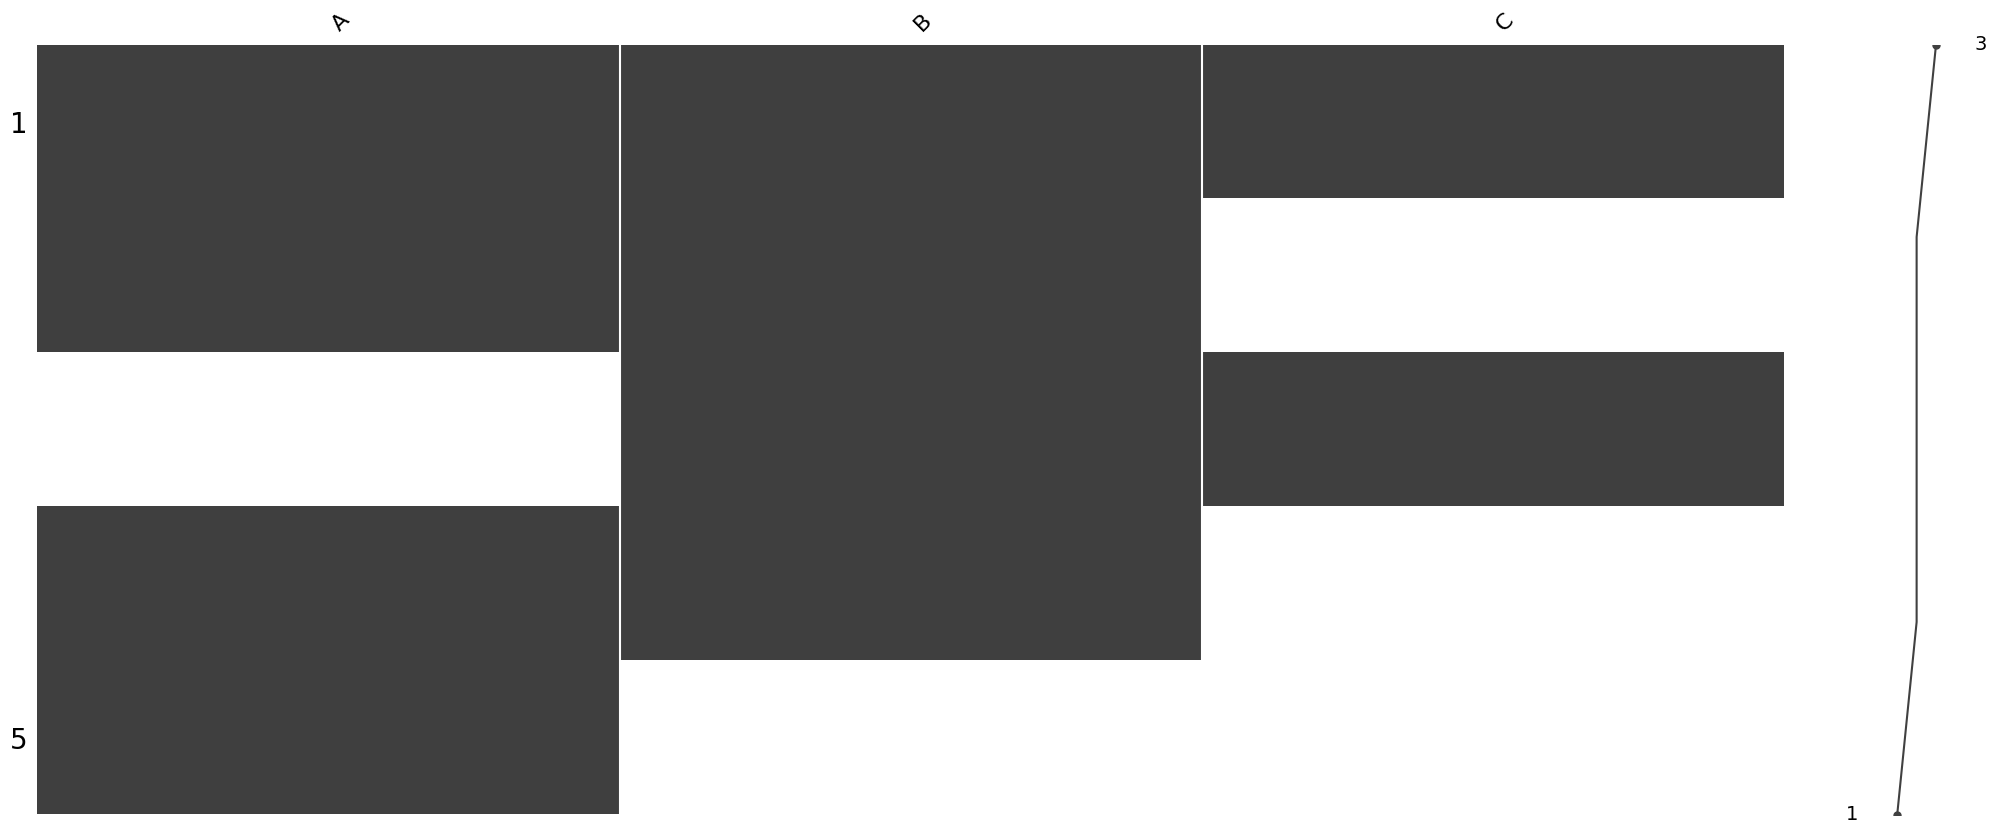

In [61]:
msno.matrix(df_with_nulls)

In [62]:
df_with_nulls.dropna() #usuwa wszystkie wiersze z brakiem danych (axis=1)(usuwa kolumny)

,A,B,C
0,1.0,2.0,40.0


In [63]:
df_with_nulls.dropna(thresh=2) #usuwa wiersze z brakującymi przynajmniej 2 danymi 

,A,B,C
0,1.0,2.0,40.0
1,100.0,4.0,NaN
2,NaN,2.0,20.0
3,1000.0,4.0,NaN


In [64]:
df_with_nulls.fillna('NOWA WARTOŚĆ') #uzupełnia brakujące dane określoną wartością

,A,B,C
0,1.0,2.0,40.0
1,100.0,4.0,NOWA WARTOŚĆ
2,NOWA WARTOŚĆ,2.0,20.0
3,1000.0,4.0,NOWA WARTOŚĆ
4,10000.0,NOWA WARTOŚĆ,NOWA WARTOŚĆ


In [65]:
df_with_nulls['B'].fillna(df_with_nulls['B'].mean()) #uzupełnia dane w kolumnie'B' średnią (mean) wartością z kol. 'B'

0    2.0
1    4.0
2    2.0
3    4.0
4    3.0
Name: B, dtype: float64

In [66]:
df_with_nulls['A'].ffill() #uzupełnia dane wartością przed brakującą (bfill po brakującej)

0        1.0
1      100.0
2      100.0
3     1000.0
4    10000.0
Name: A, dtype: float64

##Łączenie Data Frame Merge, Join, Concatenate

In [67]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],

                    'B': ['B0', 'B1', 'B2', 'B3'],

                    'C': ['C0', 'C1', 'C2', 'C3'],

                    'D': ['D0', 'D1', 'D2', 'D3']},

                    index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],

                    'B': ['B4', 'B5', 'B6', 'B7'],

                    'C': ['C4', 'C5', 'C6', 'C7'],

                    'D': ['D4', 'D5', 'D6', 'D7']},

                    index=[4, 5, 6, 7])
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],

                    'B': ['B8', 'B9', 'B10', 'B11'],

                    'C': ['C8', 'C9', 'C10', 'C11'],

                    'D': ['D8', 'D9', 'D10', 'D11']},

                    index=[8, 9, 10, 11])

In [68]:
pd.concat([df1,df2,df3]) #concat rozpoznał kolejne indexy i połączył odpowiednio DataFrame (zgodna ilość kolumn)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [69]:
s = pd.Series(['S1','S2','S3','S4'])
pd.concat([df1,s])  #inne ilości kolumn, uzupełnia kolumny dla s bez wartości

,A,B,C,D,0
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
0,NaN,NaN,NaN,NaN,S1
1,NaN,NaN,NaN,NaN,S2
2,NaN,NaN,NaN,NaN,S3
3,NaN,NaN,NaN,NaN,S4


In [70]:
pd.concat([df1,s],axis=1)  #zgodne indexy osi pionowej df1 i s wg. niej łączymy

,A,B,C,D,0
0,A0,B0,C0,D0,S1
1,A1,B1,C1,D1,S2
2,A2,B2,C2,D2,S3
3,A3,B3,C3,D3,S4


In [71]:
pd.concat([df1,df2,df3],axis=1,keys=['first','second','third']) #łączy df względem osi 'y'kolejne indexy musiał dodać pozycje bez wartości

first                second                third               
       A    B    C    D      A    B    C    D     A    B    C    D
0     A0   B0   C0   D0    NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN
1     A1   B1   C1   D1    NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN
2     A2   B2   C2   D2    NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN
3     A3   B3   C3   D3    NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN
4    NaN  NaN  NaN  NaN     A4   B4   C4   D4   NaN  NaN  NaN  NaN
5    NaN  NaN  NaN  NaN     A5   B5   C5   D5   NaN  NaN  NaN  NaN
6    NaN  NaN  NaN  NaN     A6   B6   C6   D6   NaN  NaN  NaN  NaN
7    NaN  NaN  NaN  NaN     A7   B7   C7   D7   NaN  NaN  NaN  NaN
8    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN    A8   B8   C8   D8
9    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN    A9   B9   C9   D9
10   NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN   A10  B10  C10  D10
11   NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN   A11  B11  C11  D11

In [72]:
pd.concat([df1,df2,df3],axis=0,ignore_index=True).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
A,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11
B,B0,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11
C,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
D,D0,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11


In [73]:
def make_keys(n):
    return [f'key{n}' for n in range(n)]
left = df1.copy()
left['key'] = make_keys(4)
right = df3.copy()
right['key'] = make_keys(4)
left, right

(    A   B   C   D   key
 0  A0  B0  C0  D0  key0
 1  A1  B1  C1  D1  key1
 2  A2  B2  C2  D2  key2
 3  A3  B3  C3  D3  key3,
       A    B    C    D   key
 8    A8   B8   C8   D8  key0
 9    A9   B9   C9   D9  key1
 10  A10  B10  C10  D10  key2
 11  A11  B11  C11  D11  key3)

In [74]:
pd.merge(left,right,how='inner',on='key')  #inner łączy tylko te które mają wspólne on=....('key')

,A_x,B_x,C_x,D_x,key,A_y,B_y,C_y,D_y
0,A0,B0,C0,D0,key0,A8,B8,C8,D8
1,A1,B1,C1,D1,key1,A9,B9,C9,D9
2,A2,B2,C2,D2,key2,A10,B10,C10,D10
3,A3,B3,C3,D3,key3,A11,B11,C11,D11


In [75]:
new_right = pd.DataFrame({'E': ['E1','E2','E3','E4','E5','E6'],
                          'key': make_keys(6)})
new_right

,E,key
0,E1,key0
1,E2,key1
2,E3,key2
3,E4,key3
4,E5,key4
5,E6,key5


In [76]:
pd.merge(left,new_right,how='inner',on='key')  #inner część wspólna key4 i key5 nie ma w left i nie ma w merge(inner)

,A,B,C,D,key,E
0,A0,B0,C0,D0,key0,E1
1,A1,B1,C1,D1,key1,E2
2,A2,B2,C2,D2,key2,E3
3,A3,B3,C3,D3,key3,E4


In [77]:
pd.merge(left,new_right,how='outer',on='key')  #outer całe DF połączone key4 i key5 nie ma w left są NaN wstawione

,A,B,C,D,key,E
0,A0,B0,C0,D0,key0,E1
1,A1,B1,C1,D1,key1,E2
2,A2,B2,C2,D2,key2,E3
3,A3,B3,C3,D3,key3,E4
4,NaN,NaN,NaN,NaN,key4,E5
5,NaN,NaN,NaN,NaN,key5,E6


In [78]:
other = pd.DataFrame({'E':['E1','E2','E3','E4','E5','E6']},index=['B1','B2','B3','B4','B5','B6'])
other

,E
B1,E1
B2,E2
B3,E3
B4,E4
B5,E5
B6,E6


In [79]:
left

,A,B,C,D,key
0,A0,B0,C0,D0,key0
1,A1,B1,C1,D1,key1
2,A2,B2,C2,D2,key2
3,A3,B3,C3,D3,key3


In [80]:
left.join(other,on='B') #dołączyło other do left względem kolumny 'B' z left (domyślne how='left')
                        #(B0 jest w left nie ma w other wstawione NaN)

,A,B,C,D,key,E
0,A0,B0,C0,D0,key0,NaN
1,A1,B1,C1,D1,key1,E1
2,A2,B2,C2,D2,key2,E2
3,A3,B3,C3,D3,key3,E3


In [81]:
right.index, left.index

(Index([8, 9, 10, 11], dtype='int64'), Index([0, 1, 2, 3], dtype='int64'))

In [82]:
left.join(other, on='B', how='inner') #how=inner czyli tylko część 'wspólna'

,A,B,C,D,key,E
1,A1,B1,C1,D1,key1,E1
2,A2,B2,C2,D2,key2,E2
3,A3,B3,C3,D3,key3,E3


In [83]:
left.join(right.set_index('key'),on='key', lsuffix='_left',rsuffix='_right')

,A_left,B_left,C_left,D_left,key,A_right,B_right,C_right,D_right
0,A0,B0,C0,D0,key0,A8,B8,C8,D8
1,A1,B1,C1,D1,key1,A9,B9,C9,D9
2,A2,B2,C2,D2,key2,A10,B10,C10,D10
3,A3,B3,C3,D3,key3,A11,B11,C11,D11


##EXCEL (.csv, .xlsx)
df = pd.read_csv('myCsvFile.csv')
df.to_csv('myNewCsvFile.csv', index=False) #export do csv z pominięciem nazw indeksów

In [84]:
df = pd.read_excel('myExcelFile.xlsx', sheet_name='my_data') #import z excela
df

,A,B,C
0,0,0,0
1,1,1,50
2,2,4,100
3,3,9,150
4,4,16,200
5,5,25,250
6,6,36,300
7,7,49,350
8,8,64,400
9,9,81,450


In [85]:
#!pip install openpyxl

In [86]:
df.to_excel('myNewExcelFile.xlsx', sheet_name='my_new_data')

##XlsxWriter

In [87]:
#pip install xlsxwriter
import xlsxwriter
writer = pd.ExcelWriter('pandas_simple.xlsx', engine='xlsxwriter')

In [88]:
df.to_excel(writer, sheet_name='my_dfs')
df.to_excel(writer, sheet_name='my_dfs', startcol=6, startrow=5, index=False)
writer.close()

In [89]:
writer = pd.ExcelWriter('many_sheets.xlsx', engine='xlsxwriter')

df.to_excel(writer, sheet_name='my_df1')
df.to_excel(writer, sheet_name='my_df2')
writer.close()

In [90]:
writer = pd.ExcelWriter('add_chart.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='my_chart')
workbook = writer.book
worksheet = writer.sheets['my_chart']
chart = workbook.add_chart({'type':'line'})
def grab_series(df, sheet_name, colname, startcol=0, startrow=0):

    col_index = df.columns.tolist().index(colname)
    col_letter = chr(ord('@')+(col_index+2+startcol))
    first_row = startrow + 2
    last_row = startrow + 1 + len(df)
    return f"='{sheet_name}'!{col_letter}{first_row}:{col_letter}{last_row}"
chart.add_series({'values':grab_series(df,'my_chart','B')})
chart.set_x_axis({
    'name': 'x^2',
    'name_font': {'size': 14, 'bold': True},
    'num_font':  {'italic': True },
})    
chart.set_legend({'none': True})
worksheet.insert_chart('F2', chart)
writer.close()
workbook.close()

/Users/witekhungendorfer/Desktop/Kodilla/env/lib/python3.11/site-packages/xlsxwriter/workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [91]:
writer = pd.ExcelWriter('conditional_format.xlsx', engine='xlsxwriter')

df.to_excel(writer, sheet_name='my_conditional')

workbook = writer.book
worksheet = writer.sheets['my_conditional']
format1 = workbook.add_format({'bg_color':   '#FFC7CE',
                               'font_color': '#9C0006'})
worksheet.conditional_format("D2:D12",{'type': 'cell',
                                      'criteria':'>=',
                                      'value':300,
                                      'format':format1})
worksheet.write_string('A16','Podaj liczbę całkowitą większą od 0:')
worksheet.data_validation('B16', {
    'validate':'integer',
    'criteria':'>',
    'value':0
})
worksheet.set_column('A:A',35)
writer.close()
workbook.close()

In [92]:
##Tabele HTML read_html
#!pip install lxml
import lxml

In [93]:
data = pd.read_html('https://pl.wikipedia.org/wiki/Miasta_w_Polsce', header=0)
type(data)

list

In [94]:
data[0]

,Lp.,Miasto,Województwo,Liczba mieszkańców,Gęstość zaludnienia [osoby/km²]
0,1.0,Warszawa,mazowieckie,1860281,3597
1,2.0,Kraków,małopolskie,800653,2450
2,3.0,Wrocław,dolnośląskie,672929,2298
3,4.0,Łódź,łódzkie,670642,2287
4,5.0,Poznań,wielkopolskie,546859,2088
5,6.0,Gdańsk,pomorskie,486022,1855
6,7.0,Szczecin,zachodniopomorskie,396168,1318
7,8.0,Bydgoszcz,kujawsko-pomorskie,337666,1919
8,9.0,Lublin,lubelskie,334681,2270
9,10.0,Białystok,podlaskie,294242,2881


In [95]:
data[1]

,Lp.,Miasto,Województwo,Powierzchnia [ha]
0,1.0,Warszawa,mazowieckie,51 724
1,2.0,Kraków,małopolskie,32 685
2,3.0,Szczecin,zachodniopomorskie,30 060
3,4.0,Łódź,łódzkie,29 325
4,5.0,Wrocław,dolnośląskie,29 282
5,6.0,Zielona Góra,lubuskie,27 832
6,7.0,Gdańsk,pomorskie,26 196
7,8.0,Poznań,wielkopolskie,26 191
8,9.0,Świnoujście,zachodniopomorskie,20 207
9,10.0,Dąbrowa Górnicza,śląskie,18 873


In [96]:
##Album Wszechczasów

In [97]:
data = pd.read_html('https://www.officialcharts.com/chart-news/the-best-selling-albums-of-all-time-on-the-official-uk-chart__15551/', header=0)
type(data)

list

In [98]:
data[0].transpose().index

Index(['POS', 'TITLE', 'ARTIST', 'YEAR', 'HIGH POSN'], dtype='object')

In [99]:
data[0].sort_values(by='HIGH POSN')

,POS,TITLE,ARTIST,YEAR,HIGH POSN
0,1,GREATEST HITS,QUEEN,1981,1
32,33,ONLY BY THE NIGHT,KINGS OF LEON,2008,1
33,34,BEAUTIFUL WORLD,TAKE THAT,2006,1
34,35,HOPES AND FEARS,KEANE,2004,1
35,36,THE JOSHUA TREE,U2,1987,1
37,38,SCISSOR SISTERS,SCISSOR SISTERS,2004,1
38,39,BUT SERIOUSLY,PHIL COLLINS,1989,1
39,40,X&Y,COLDPLAY,2005,1
40,41,JAGGED LITTLE PILL,ALANIS MORISSETTE,1995,1
41,42,TUBULAR BELLS,MIKE OLDFIELD,1973,1


In [100]:
data[0].columns=['POZ','TYTUŁ','ARTYSTA','ROK','MAX POZ']

In [101]:
data[0]

,POZ,TYTUŁ,ARTYSTA,ROK,MAX POZ
0,1,GREATEST HITS,QUEEN,1981,1
1,2,GOLD - GREATEST HITS,ABBA,1992,1
2,3,SGT PEPPER'S LONELY HEARTS CLUB BAND,BEATLES,1967,1
3,4,21,ADELE,2011,1
4,5,WHAT'S THE STORY MORNING GLORY,OASIS,1995,1
5,6,THRILLER,MICHAEL JACKSON,1982,1
6,7,THE DARK SIDE OF THE MOON,PINK FLOYD,1973,2
7,8,BROTHERS IN ARMS,DIRE STRAITS,1985,1
8,9,BAD,MICHAEL JACKSON,1987,1
9,10,GREATEST HITS II,QUEEN,1991,1


In [102]:
data[0].sort_values(by='MAX POZ')

,POZ,TYTUŁ,ARTYSTA,ROK,MAX POZ
0,1,GREATEST HITS,QUEEN,1981,1
32,33,ONLY BY THE NIGHT,KINGS OF LEON,2008,1
33,34,BEAUTIFUL WORLD,TAKE THAT,2006,1
34,35,HOPES AND FEARS,KEANE,2004,1
35,36,THE JOSHUA TREE,U2,1987,1
37,38,SCISSOR SISTERS,SCISSOR SISTERS,2004,1
38,39,BUT SERIOUSLY,PHIL COLLINS,1989,1
39,40,X&Y,COLDPLAY,2005,1
40,41,JAGGED LITTLE PILL,ALANIS MORISSETTE,1995,1
41,42,TUBULAR BELLS,MIKE OLDFIELD,1973,1


In [103]:
data[0].sort_values(by='MAX POZ').to_csv('Album.csv', index=True)

In [104]:
data[0].value_counts('ARTYSTA',normalize=True)

ARTYSTA
COLDPLAY                    0.050000
TAKE THAT                   0.050000
ABBA                        0.033333
DIDO                        0.033333
MICHAEL JACKSON             0.033333
ADELE                       0.033333
ORIGINAL SOUNDTRACK         0.033333
QUEEN                       0.033333
ROBBIE WILLIAMS             0.033333
FLEETWOOD MAC               0.033333
BEATLES                     0.033333
SNOW PATROL                 0.016667
SIMPLY RED                  0.016667
SIMON & GARFUNKEL           0.016667
OASIS                       0.016667
SHANIA TWAIN                0.016667
SCISSOR SISTERS             0.016667
SPICE GIRLS                 0.016667
REM                         0.016667
TRACY CHAPMAN               0.016667
PINK FLOYD                  0.016667
PHIL COLLINS                0.016667
PAUL SIMON                  0.016667
TRAVIS                      0.016667
U2                          0.016667
ORIGINAL CAST RECORDING     0.016667
MICHAEL BUBLE               0.

In [105]:
data[0].groupby('ARTYSTA').count().sort_values(by='ROK',ascending=False)

,POZ,TYTUŁ,ROK,MAX POZ
ARTYSTA,,,,
COLDPLAY,3,3,3,3
TAKE THAT,3,3,3,3
ABBA,2,2,2,2
DIDO,2,2,2,2
MICHAEL JACKSON,2,2,2,2
ADELE,2,2,2,2
ORIGINAL SOUNDTRACK,2,2,2,2
QUEEN,2,2,2,2
ROBBIE WILLIAMS,2,2,2,2


In [106]:
data[0].groupby(["ARTYSTA",'TYTUŁ'])['ROK'].max()

ARTYSTA                   TYTUŁ                                 
ABBA                      GOLD - GREATEST HITS                      1992
                          GREATEST HITS                             1975
ADELE                     21                                        2011
                          25                                        2015
ALANIS MORISSETTE         JAGGED LITTLE PILL                        1995
AMY WINEHOUSE             BACK TO BLACK                             2006
BEATLES                   1                                         2000
                          SGT PEPPER'S LONELY HEARTS CLUB BAND      1967
BOB MARLEY & THE WAILERS  LEGEND                                    1984
COLDPLAY                  A RUSH OF BLOOD TO THE HEAD               2002
                          PARACHUTES                                2000
                          X&Y                                       2005
CORRS                     TALK ON CORNERS                  

In [107]:
data[0].groupby(pd.Grouper(key='ARTYSTA')).agg({'TYTUŁ':'count','ROK':'max'})

,TYTUŁ,ROK
ARTYSTA,,
QUEEN,2,1991
ABBA,2,1992
BEATLES,2,2000
ADELE,2,2015
OASIS,1,1995
MICHAEL JACKSON,2,1987
PINK FLOYD,1,1973
DIRE STRAITS,1,1985
FLEETWOOD MAC,2,1987


In [108]:
#data[0]['ROK']=pd.to_datetime(data[0]['ROK'])
#data[0].convert_dtypes()
data[0].dtypes

POZ         int64
TYTUŁ      object
ARTYSTA    object
ROK         int64
MAX POZ     int64
dtype: object

In [119]:
data[0]=data[0].rename(str.title,axis=1)

In [120]:
data[0]

,Poz,Tytuł,Artysta,Rok,Max Poz
0,1,GREATEST HITS,QUEEN,1981,1
1,2,GOLD - GREATEST HITS,ABBA,1992,1
2,3,SGT PEPPER'S LONELY HEARTS CLUB BAND,BEATLES,1967,1
3,4,21,ADELE,2011,1
4,5,WHAT'S THE STORY MORNING GLORY,OASIS,1995,1
5,6,THRILLER,MICHAEL JACKSON,1982,1
6,7,THE DARK SIDE OF THE MOON,PINK FLOYD,1973,2
7,8,BROTHERS IN ARMS,DIRE STRAITS,1985,1
8,9,BAD,MICHAEL JACKSON,1987,1
9,10,GREATEST HITS II,QUEEN,1991,1


In [118]:
data[0]['Artysta'].nunique()

47

In [145]:
data[0].drop(['Max Poz'],axis=1)

,Poz,Tytuł,Artysta,Rok
0,1,GREATEST HITS,QUEEN,1981
1,2,GOLD - GREATEST HITS,ABBA,1992
2,3,SGT PEPPER'S LONELY HEARTS CLUB BAND,BEATLES,1967
3,4,21,ADELE,2011
4,5,WHAT'S THE STORY MORNING GLORY,OASIS,1995
5,6,THRILLER,MICHAEL JACKSON,1982
6,7,THE DARK SIDE OF THE MOON,PINK FLOYD,1973
7,8,BROTHERS IN ARMS,DIRE STRAITS,1985
8,9,BAD,MICHAEL JACKSON,1987
9,10,GREATEST HITS II,QUEEN,1991


In [121]:
##PIVOT (tabela przestawana)

In [122]:
df = pd.read_excel('Pivot.xlsx')
df.head()

,Data,Produkt,Region,Przedstawiciel,Klient,Sztuki,Sprzedaż,Koszty
0,2020-01-01,Quad,Wschód,Szymon,AA,16,432.17,232.99
1,2020-01-02,Bellen,Południe,Grzegorz,KBTB,24,528.50,240.35
2,2020-01-02,Quad,Zachód,Paulina,AST,30,810.71,435.64
3,2020-01-02,Bellen,Zachód,Paulina,SFWK,19,418.54,190.05
4,2020-01-03,Sunshine,Wschód,Paulina,FM,38,722.22,304.06


In [124]:
df.pivot_table(values='Sprzedaż', index='Przedstawiciel', columns ='Region', aggfunc=np.sum) #np=numpy sumowanie (aggfunc (domyślnie średnia), ustawione np.sum)) po "Sprzedaż"(values)

Region,Południe,Wschód,Zachód,ZachódCentrum
Przedstawiciel,,,,
Franciszek,3029.98,8919.85,1608.96,NaN
Grzegorz,2040.69,4854.15,4376.02,154.34
Krystian,2228.68,7894.56,2006.31,NaN
Patryk,5769.22,5670.96,2828.02,816.84
Paulina,1954.58,6696.10,9790.96,1449.21
Szymon,4791.80,3633.19,4168.15,NaN


In [125]:
df.pivot_table(values='Sprzedaż', index='Przedstawiciel', columns ='Region', aggfunc=np.sum).fillna(0).round(2) #fillna(0)NaN zamieniamy na 0

Region,Południe,Wschód,Zachód,ZachódCentrum
Przedstawiciel,,,,
Franciszek,3029.98,8919.85,1608.96,0.00
Grzegorz,2040.69,4854.15,4376.02,154.34
Krystian,2228.68,7894.56,2006.31,0.00
Patryk,5769.22,5670.96,2828.02,816.84
Paulina,1954.58,6696.10,9790.96,1449.21
Szymon,4791.80,3633.19,4168.15,0.00


In [126]:
df.pivot_table(values='Sprzedaż',index=['Region','Przedstawiciel'],aggfunc=np.sum).round(2)  #inny sposób przedstawienia (multindex)

Sprzedaż
Region        Przedstawiciel          
Południe      Franciszek       3029.98
              Grzegorz         2040.69
              Krystian         2228.68
              Patryk           5769.22
              Paulina          1954.58
              Szymon           4791.80
Wschód        Franciszek       8919.85
              Grzegorz         4854.15
              Krystian         7894.56
              Patryk           5670.96
              Paulina          6696.10
              Szymon           3633.19
Zachód        Franciszek       1608.96
              Grzegorz         4376.02
              Krystian         2006.31
              Patryk           2828.02
              Paulina          9790.96
              Szymon           4168.15
ZachódCentrum Grzegorz          154.34
              Patryk            816.84
              Paulina          1449.21

In [133]:
df.pivot_table(values='Sprzedaż',index='Region',aggfunc=[len,np.max,np.min]).round(0) #len ilość rekordów sprzedaży dla danego regionu

,len,amax,amin
,Sprzedaż,Sprzedaż,Sprzedaż
Region,,,
Południe,27,1512.0,115.0
Wschód,50,1675.0,153.0
Zachód,24,5001.0,132.0
ZachódCentrum,4,1449.0,154.0


In [134]:
##Apply

In [137]:
def commission_fee(x):
    '''
    funkcja zwraca wyskość prowizji w zależności od wysokości transakcji
    (tabelka z transakcjami wcześniej) 
    prowizja w zależności od wartości transakcji: 0-0%, 300-3%,900-6%
    '''
    if x <= 300:
        return 0
    elif x<=900:
        return x*0.03
    else:
        return x*0.06

In [140]:
df['commission_fee']=df['Sprzedaż'].apply(lambda x: commission_fee(x)) #dodanie kolumny 'commission_fee' równej %*'Sprzedaż'
df.head()

,Data,Produkt,Region,Przedstawiciel,Klient,Sztuki,Sprzedaż,Koszty,commission_fee
0,2020-01-01,Quad,Wschód,Szymon,AA,16,432.17,232.99,12.9651
1,2020-01-02,Bellen,Południe,Grzegorz,KBTB,24,528.50,240.35,15.8550
2,2020-01-02,Quad,Zachód,Paulina,AST,30,810.71,435.64,24.3213
3,2020-01-02,Bellen,Zachód,Paulina,SFWK,19,418.54,190.05,12.5562
4,2020-01-03,Sunshine,Wschód,Paulina,FM,38,722.22,304.06,21.6666


In [142]:
import math
df['#_opakowań'] = df['Sztuki'].apply(lambda x: math.ceil(x/5)) #"Sztuki"/5 zaokrąglone do góry
df.head()

,Data,Produkt,Region,Przedstawiciel,Klient,Sztuki,Sprzedaż,Koszty,commission_fee,#_opakowań
0,2020-01-01,Quad,Wschód,Szymon,AA,16,432.17,232.99,12.9651,4
1,2020-01-02,Bellen,Południe,Grzegorz,KBTB,24,528.50,240.35,15.8550,5
2,2020-01-02,Quad,Zachód,Paulina,AST,30,810.71,435.64,24.3213,6
3,2020-01-02,Bellen,Zachód,Paulina,SFWK,19,418.54,190.05,12.5562,4
4,2020-01-03,Sunshine,Wschód,Paulina,FM,38,722.22,304.06,21.6666,8


In [143]:
def bonus(row):
    '''
    przyznanie bonusa 200 dla transakcji 
    o rentowności większej niż 0.55 <(Sprzedaż - Koszty)/Sprzedaż
    '''
    margin = (row['Sprzedaż']-row["Koszty"])/row['Sprzedaż']
    if margin > 0.55:
        return 200
    else:
        return 0

In [ ]:
df['Bonus']=df.apply